# LGM Data Science Internship Programme
## Beginner Level Task-2
## Name of Project : Stock Market Prediction And Forecasting Using Stacked LSTM
#### Dataset-: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [28]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [29]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [50]:
hf=df.sort_values(by='Date')
hf.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [51]:
hf.reset_index(inplace=True)

In [52]:
hf.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


###  Visualization

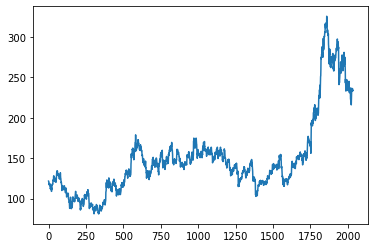

In [53]:
plt.plot(hf['Close'])

In [54]:
jf=hf['Close']
jf

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [55]:
scale=MinMaxScaler(Feature_Range=(0,1))
jf=scale.fit_Transform(np.array(jf).reshape(-1,1))
jf

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [57]:
Training_Size=int(len(jf)*0.70)
Test_Size=len(jf)-Training_Size
Train_Data,Test_Data=jf[0:Training_Size,:],jf[Training_Size:len(jf),:1]

In [58]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [59]:
Time_Step = 100
X_Train, y_Train = Create_Dataset(Train_Data, Time_Step)
X_Test, yTest = Create_Dataset(Test_Data, Time_Step)

In [39]:
print(X_Train.shape), print(y_Train.shape)

(1323, 100)
(1323,)


(None, None)

In [40]:
print(X_Test.shape), print(yTest.shape)

(510, 100)
(510,)


(None, None)

In [41]:
X_Train =X_Train.reshape(X_Train.shape[0],X_Train.shape[1] , 1)
X_Test = X_Test.reshape(X_Test.shape[0],X_Test.shape[1] , 1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_Train,y_Train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 14s 387ms/step - loss: 0.0100 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 5s 264ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 5s 256ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 5s 278ms/step - loss: 8.8880e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 5s 260ms/step - loss: 8.9466e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 5s 266ms/step - loss: 8.6637e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 5s 269ms/step - loss: 8.5422e-04 - val_loss: 0.0011-0
Epoch 8/60
19/19 [==============================] - 5s 264ms/step - loss: 7.9389e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 5s 257ms/step - loss: 7.7762e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 5s 268ms/step - loss

In [45]:
Test_predict=model.predict(X_test)

In [46]:
Test_predicted=scaler.inverse_transform(Test_predict)
Test_predicted

array([[142.34607 ],
       [142.57924 ],
       [141.82677 ],
       [139.41049 ],
       [137.69127 ],
       [136.97032 ],
       [137.86395 ],
       [139.30763 ],
       [139.84941 ],
       [139.67374 ],
       [139.50465 ],
       [140.53801 ],
       [141.33287 ],
       [142.8109  ],
       [144.90352 ],
       [143.38141 ],
       [141.13113 ],
       [140.49832 ],
       [140.86116 ],
       [145.22932 ],
       [149.54515 ],
       [152.03029 ],
       [152.73419 ],
       [151.01581 ],
       [150.60852 ],
       [150.22623 ],
       [150.4465  ],
       [151.9093  ],
       [152.67671 ],
       [152.76897 ],
       [153.13922 ],
       [152.13617 ],
       [149.15277 ],
       [143.80147 ],
       [140.2531  ],
       [138.98741 ],
       [138.97292 ],
       [138.3051  ],
       [136.3243  ],
       [133.02527 ],
       [130.55829 ],
       [129.25395 ],
       [127.30348 ],
       [126.391106],
       [124.550705],
       [122.13682 ],
       [121.22898 ],
       [120.7

###  performance 

In [47]:
import math
from sklearn.metrics import mean_squared_error

In [48]:
performance = math.sqrt(mean_squared_error(yTest,Test_predict))
performance

0.05230493050598955